 
# PREDICTION OF FARE OF AIRLINE TICKETS USING MACHINE LEARNING



## Problem Statement


### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. We are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. 


*   Size of training set: 10683 records
*   Size of test set: 2671 records
*   FEATURES: Airline: The name of the airline.
*   Destination: The destination where the service ends.
*   Route: The route taken by the flight to reach the destination.
*   Arrival_Time: Time of arrival at the destination.
*   Duration: Total duration of the flight.
*   Total_Stops: Total stops between the source and destination.
*   Additional_Info: Additional information about the flight
*   Price: The price of the ticket

## Data Preprocessing

### 1) Importing dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_excel('/content/Data_Train.xlsx')


In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 2) Checking and deleting null values

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only two missing values so drop those rows entirely.

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

hence no missing values.

Understanding the data: 

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### 3) Rectifying and Modifying columns as needed


#### a) Columns 'Date_of_Journey' 'Dep_Time'  'Arrival_Time' and 'Duration'

From description we can see that 'Date_of_Journey' is a object data type,therefore,we have to convert this datatype into timestamp so as to use this column properly for prediction,because our 
 model will not be able to understand these string values,it will just understand Time-stamp dtype.
For this we require pandas to_datetime to convert object data type to datetime dtype.
 
 
dt.day method will extract only day of that date
dt.month method will extract only month of that date

In [11]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

check if datatypes are changed

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-08 18:05:00,2021-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-08 16:50:00,2021-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-08 18:05:00,2021-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-08 16:50:00,2021-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


extract hours and minutes from dep time and arrival time.

In [18]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [19]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Changes on duration time

In [23]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [24]:
train_data['Duration']=duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


in row 3 19h converted into 19h 0m

In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [27]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
train_data.drop('Duration',axis=1,inplace=True)

In [30]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [31]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

### 4) Dividing into Categorical variables and continuous variables

In [34]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']

In [35]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']

In [36]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


### 5) Categorical Columns 

<ul>
    <li>Nominal data --> data are not in any order --> OneHotEncoder is used in this case</li>
    <li>Ordinal data --> data are in order -->       LabelEncoder is used in this case</li>
</ul>



####  a) As Airline is Nominal Categorical data ---- perform OneHotEncoding

In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
len(categorical['Airline'].unique())

12

In [39]:
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### b) As Source is Nominal Categorical data ----- perform OneHotEncoding

In [40]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [41]:
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### c) As Destination is Nominal Categorical data we will perform OneHotEncoding

In [42]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### d) Splitting route column into 5 columns eliminating '->'

In [44]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [47]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

In [48]:
drop_column(categorical,'Route')

In [49]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [50]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


Since Route 2 Route 3 Route 4 has higher number of categories, OneHot Encoding cannot be used.


Using LabelEncoder

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
encoder = LabelEncoder()

In [53]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [54]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


#### e) Drop column 'Additional_Info'



In [56]:
drop_column(categorical,'Additional_Info')

#### f) Encoding 'Total_Stops'

In [57]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
dict = {'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [59]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


#### g) Concatenating all categorical dataframes with continous columns

In [61]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [62]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [63]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [64]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


Display all 35 columns

In [65]:
pd.set_option('display.max_columns',35)

In [66]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### 6) Detection and imputation of outliers

In [67]:
def plot(df,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

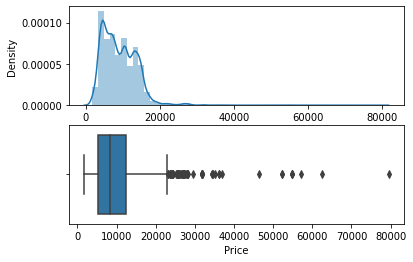

In [68]:
plot(data_train,'Price')

data points above 40,000 are outliers

Imputing outliers (price>=40000) by median of the data

In [69]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

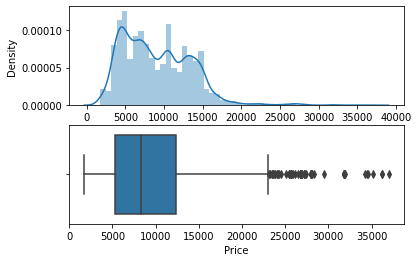

In [70]:
plot(data_train,'Price')

### 7) Separate Independent and Dependent features

X contains all independent features and Y contains dependent features

In [71]:
X = data_train.drop('Price',axis=1)

In [72]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [73]:
y = data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### 8) Apply feature selection on data from information gain

#### find the feature which contributes most to the target variable i.e price

In [74]:
from sklearn.feature_selection import mutual_info_classif

In [75]:
mutual_info_classif(X,y)

array([2.13870682, 2.01768681, 2.78255317, 2.24655465, 1.51721703,
       0.69816115, 0.76819092, 0.10105126, 0.6818445 , 0.94157738,
       0.        , 0.56599208, 0.02374049, 0.31452927, 0.00672355,
       0.23102612, 0.        , 0.16750824, 1.54092764, 0.86745796,
       0.29720842, 1.56657868, 0.40370881, 0.29072883, 0.17947636,
       0.38086795, 1.06861429, 0.85750219, 1.42760485, 1.19713258,
       1.84441259, 1.53990995, 1.7844554 , 1.06896561])

In [76]:
imp= pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

#### Print columns from highest to lowest importance

In [77]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.762424
Route_3,2.344591
Total_Stops,2.154608
Route_1,2.025183
Arrival_Time_hour,1.830660
Duration_hours,1.776937
Cochin,1.565256
Delhi,1.548946
Arrival_Time_minute,1.512935
Route_4,1.469753


## Data Analysis

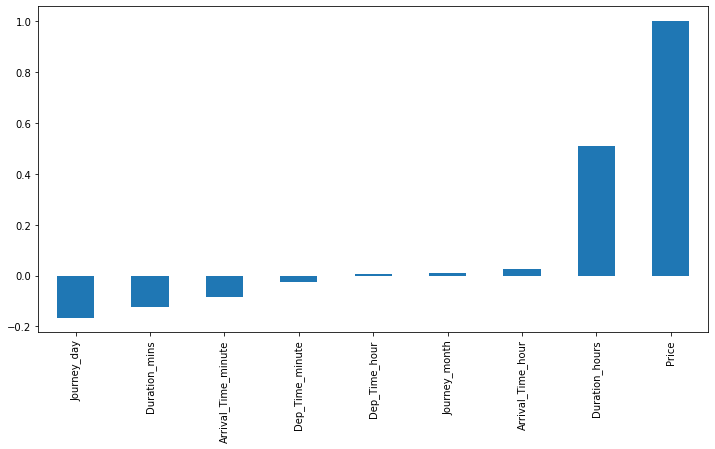

In [78]:
plt.figure(figsize=(12,6))
train_data.corr()['Price'].sort_values().plot(kind='bar');

Conclusion:

*   Departure time, Journey month, Arrival time and duration have positive correlation with price
*   Duration hours have maximum correlation with price.

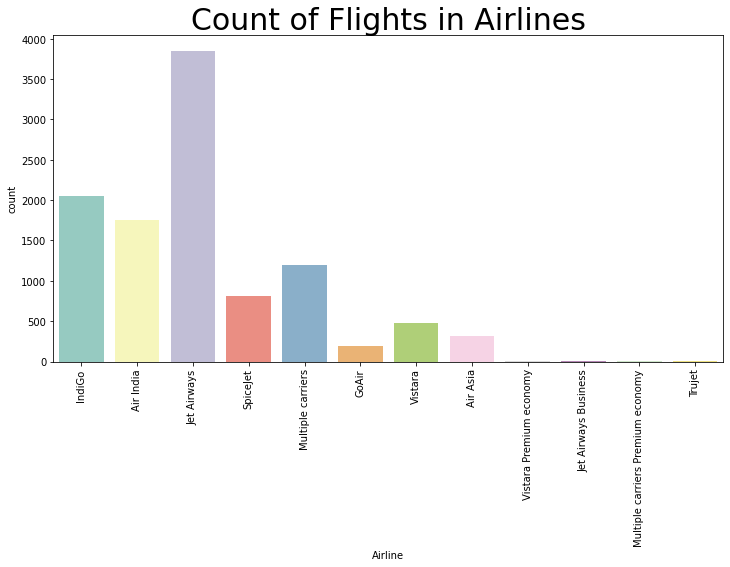

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(train_data['Airline'], palette='Set3')
plt.title('Count of Flights in Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

Conclusion:

*   Jet Airways have the maximum number of flights
*   Vistara Premium economy, Jet Airways Business, Multiple carriers Premium economy and Trujet have very few or none as compared to the rest of the airlines.

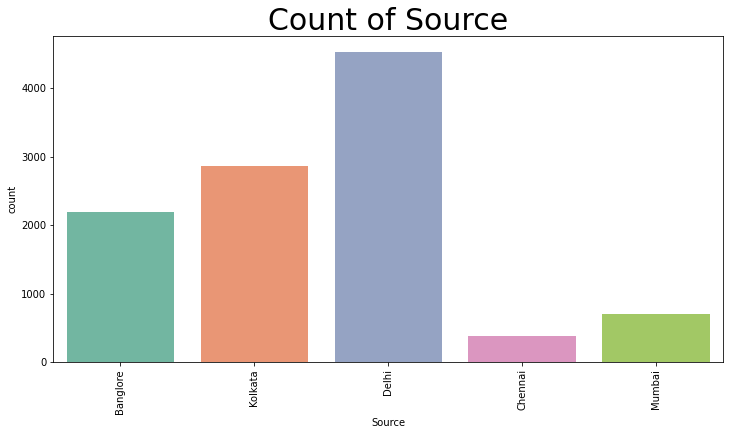

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(train_data['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()


Conclusion:

*   Delhi has the maximum number of flights that leave it.
*   Chennai has the minimum number of flights that leave it.

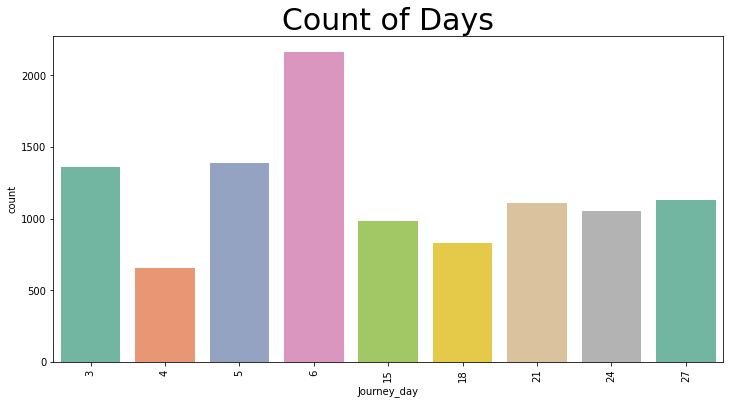

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(train_data['Journey_day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

Conclusion:

*   The first week of any month have more flights as compared to the rest of the month.

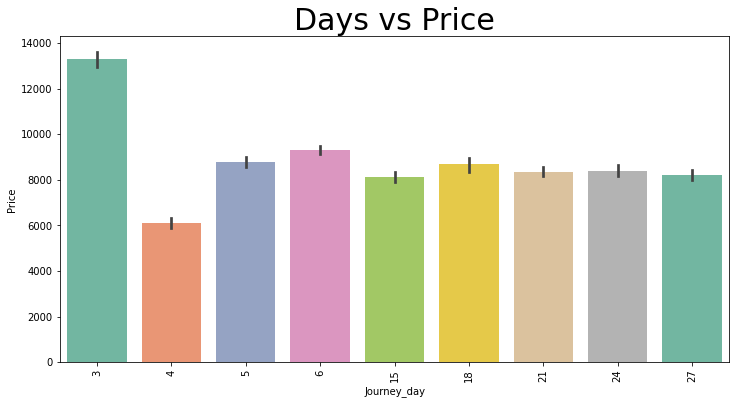

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(train_data['Journey_day'], train_data['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Conclusion:

*   The cost of flights for the first week of any month is more as compared to the rest of the month.
*   Price seems to dip on the 4th day of the month and increases back on the 5th.


In [83]:
train_data['Journey_month'] = train_data['Journey_month'].map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
plt.figure(figsize=(12,6))
sns.barplot(train_data['Journey_month'], train_data['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

SyntaxError: ignored

Conclusion:

*   The price of flights is highest in the month of January 
*   The price of flights is lowest in the month of April 

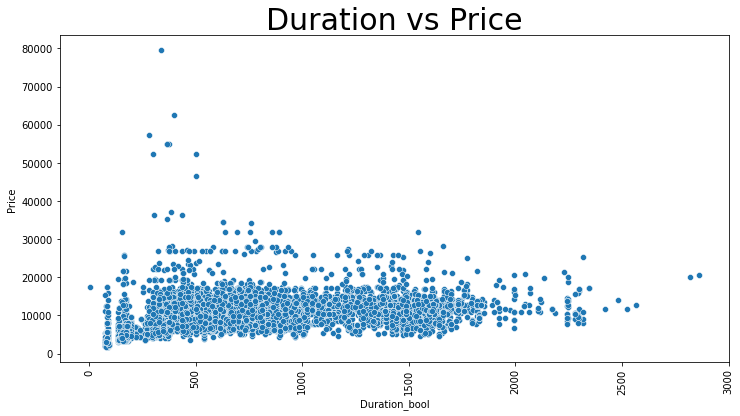

In [84]:
train_data['Duration_bool'] = (train_data['Duration_hours']*60)+train_data['Duration_mins']

plt.figure(figsize=(12,6))
sns.scatterplot(train_data['Duration_bool'], train_data['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Conclusion:

*   There is not much fluctuation in flight prices for durations in between 200 minutes to 2000 minutes.

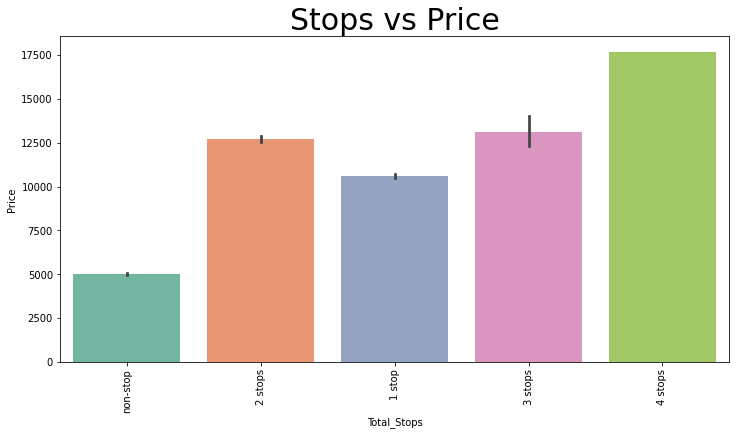

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(train_data['Total_Stops'], train_data['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Conclusion:

*   The price of increases with the number of stops
*   The price suddenly increases for flights with 2 stops

## Machine Learning Model

### 9) Split data into train and test dataframes

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn import metrics

In [91]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    print('\n')
    print(df)
    print(classification_report(y_test, y_prediction))
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('model.pkl','wb')
        pickle.dump(model,file)

### 10) Apply Random Forest 

In [82]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.95447277856683
r2 score: 0.8043537594764729
MAE: 1163.0079598341658
MSE: 3856058.311862001
RMSE: 1963.6848809984765


       Actual     Predicted
2934   7530.0   7385.878667
340    7229.0   7878.964167
2351   2071.0   3304.010833
8368  13292.0  12079.326667
7388  13039.0  12659.280000
...       ...           ...
4582  14815.0  14676.079000
2060  14231.0  11495.066667
3586   7038.0   6946.730000
5951   9794.0   9482.085000
7092   3841.0   3973.120000

[2137 rows x 2 columns]


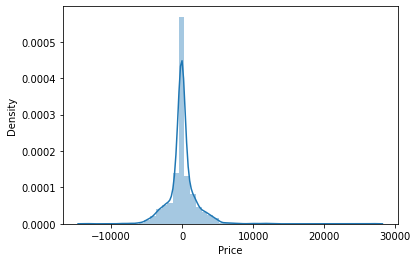

In [83]:
predict(RandomForestRegressor(),1)

Inferences: 
<ul>
    <li>95% training score</li>
    <li>r2 score - 84% accuracy</li>
    <li>peak at 0: more than 70% data points are predicted correctly</li>
</ul>

### 11) Apply Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

Training score : 0.6133524355627671
r2 score: 0.6241720771086106
MAE: 1909.7590661068043
MSE: 7407320.386107297
RMSE: 2721.639282878482


       Actual     Predicted
2934   7530.0  11431.909286
340    7229.0   7457.872917
2351   2071.0   5989.829766
8368  13292.0  13873.793367
7388  13039.0  11572.771456
...       ...           ...
4582  14815.0  14482.695977
2060  14231.0  11097.744781
3586   7038.0   9313.639351
5951   9794.0  10232.082089
7092   3841.0   3392.138378

[2137 rows x 2 columns]


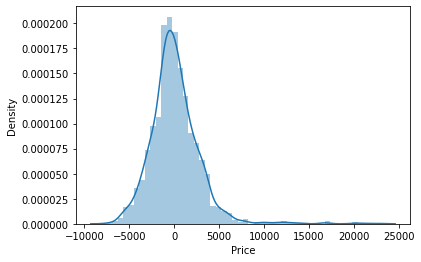

In [85]:
predict(LinearRegression(),1)

Inferences: 
<ul>
    <li>61% training score</li>
    <li>r2 score - 62% accuracy</li>
</ul>

### 12) Apply KNN 

In [86]:
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.7824870480045687
r2 score: 0.6415428987828233
MAE: 1750.0652316331305
MSE: 7064952.952306973
RMSE: 2657.997921802606


       Actual  Predicted
2934   7530.0     7646.6
340    7229.0     7114.0
2351   2071.0     4083.8
8368  13292.0    11977.4
7388  13039.0    11989.2
...       ...        ...
4582  14815.0    11844.0
2060  14231.0    10902.0
3586   7038.0     6562.0
5951   9794.0     9533.2
7092   3841.0     3914.0

[2137 rows x 2 columns]


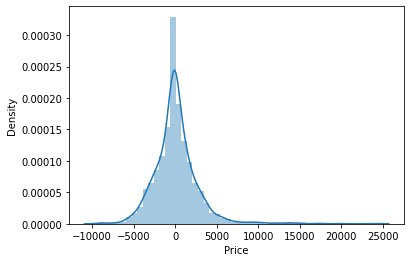

In [87]:
predict(KNeighborsRegressor(),1)

Inferences: 
<ul>
    <li>67% training score</li>
    <li>r2 score - 67% accuracy</li>
</ul>

### 13) Apply Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9673376403749532
r2 score: 0.690328865356738
MAE: 1329.8246607393542
MSE: 6103413.740481724
RMSE: 2470.5088019437867


       Actual  Predicted
2934   7530.0     7408.0
340    7229.0     7622.5
2351   2071.0     3759.0
8368  13292.0    13292.0
7388  13039.0    12199.0
...       ...        ...
4582  14815.0    14158.5
2060  14231.0    11134.0
3586   7038.0     7740.0
5951   9794.0     9315.0
7092   3841.0     3873.0

[2137 rows x 2 columns]


ValueError: ignored

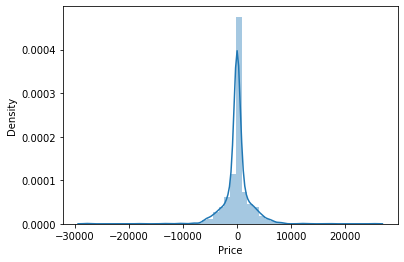

In [92]:
predict(DecisionTreeRegressor(),0)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

NameError: ignored

Inferences: 
<ul>
    <li>96% training score</li>
    <li>r2 score - 76% accuracy</li>
</ul>

### 14) Hyperparameter Tuning

1.Choose following method for hyperparameter tuning

    a.RandomizedSearchCV --> Fast way to Hypertune model

    b.GridSearchCV--> Slow way to hypertune my model
  
 
2.Assign hyperparameters in form of dictionary

3.Fit the model

4.Check best paramters and best score

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [101]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [102]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [103]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [104]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [105]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
prediction=rf_random.predict(X_test)

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
metrics.r2_score(y_test,prediction)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

### 15) Save the model and reuse again

In [ ]:
import pickle

In [ ]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [ ]:
# dump information to that file
pickle.dump(rf_random,file)

In [ ]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [ ]:
y_prediction=forest.predict(X_test)

In [ ]:
y_prediction

In [ ]:
metrics.r2_score(y_test,y_prediction)

## Final Conclusions:



*   The price depends most on the Total Stops and the route taken
*   The models of Random Forest and Decision Tree seem to give the best accuracy for prediction with 84% and 76% accuracy respective.


 Accuracy (R2) and Training scores for all the models used:



1.   Random Forest

      *   Accuracy: 95 %
      *   Training score: 84%

2.   Decision Tree

      *   Accuracy: 96 %
      *   Training score: 76%

3.   KNN

      *   Accuracy: 67 %
      *   Training score: 67%

4.   Linear Regression

      *   Accuracy: 62%
      *   Training score: 61%
    
